## Average number of points-per-object over the distance for multiple datasets. The shaded area corresponds to the area of plus/minus one standard deviation.

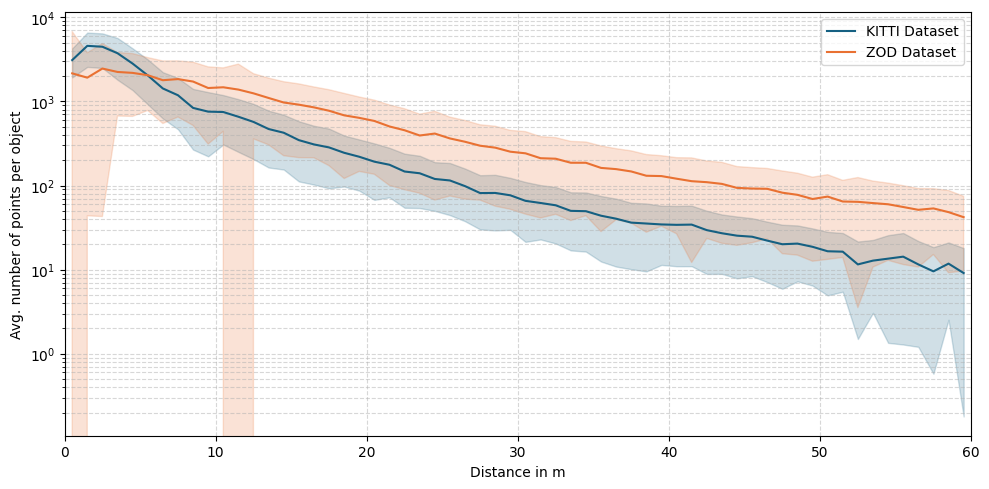

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_csv(path):
    df = pd.read_csv(path)
    x = (df['bin_start'] + df['bin_end']) / 2
    y = df['avg_points_per_object']
    y_std = df['std_points_per_object'] if 'std_points_per_object' in df else np.zeros_like(y)
    return x, y, y_std

# Pfade zu deinen CSVs
kitti_csv = "/home/rlab10/OpenPCDet/tools/eval_utils/kitti_csv"
zod_csv = "/home/rlab10/OpenPCDet/tools/eval_utils/zod_csv"

# Daten laden
x_kitti, y_kitti, y_kitti_std = load_csv(kitti_csv)
x_zod, y_zod, y_zod_std = load_csv(zod_csv)

plt.figure(figsize=(10, 5))
plt.plot(x_kitti, y_kitti, label="KITTI Dataset", color="#156082")
plt.plot(x_zod, y_zod, label="ZOD Dataset", color="#E97132")

# Optional: Unsicherheitsbereich/Fläche (falls vorhanden, z.B. als y_std)
plt.fill_between(x_kitti, y_kitti - y_kitti_std, y_kitti + y_kitti_std, color="#156082", alpha=0.2)
plt.fill_between(x_zod, y_zod - y_zod_std, y_zod + y_zod_std, color="#E97132", alpha=0.2)

plt.yscale("log")
plt.xlabel("Distance in m")
plt.ylabel("Avg. number of points per object")
plt.xlim(0, 60)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()